## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [4]:
df = pd.read_csv('/Users/Andrew/Documents/Docs/Analytics/A:B testing/Analyze AB Test Results (Sadiq Alreemi)/AnalyzeABTestResults/ab_data.csv')
df.head()


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [13]:
print(df.shape)
print(df.info())
print(df.dtypes)

(294478, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB
None
user_id          int64
timestamp       object
group           object
landing_page    object
converted        int64
dtype: object


In [14]:
# AK: histogram of the number of records with different timestamp per user
df.groupby(by='user_id').agg({'timestamp':'count'}).reset_index().groupby(by='timestamp').agg({'user_id':['count', pd.Series.nunique]})
# so we have duplicates

user_id        
            count nunique
timestamp                
1          286690  286690
2            3894    3894

c. The number of unique users in the dataset.

In [15]:
n_unique_users = len(df.user_id.unique())
print(n_unique_users)
print(df.nunique())

290584
user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64


d. The proportion of users converted.

In [6]:
n_conversions = df.groupby(by='user_id').agg({'converted':'sum'})['converted'].sum()
print(f'n_conversions: {n_conversions}')
n_conversions_share = n_conversions / n_unique_users
print(f'n_conversions_share: {n_conversions_share}')

# one guy calculated like this (see pdf)
print(df.converted.mean())
# this is the share of pageview with conversion (because our data isn't agregated around users but represents pageviews with conversions)


n_conversions: 35237
n_conversions_share: 0.12126269856564711
0.11965919355605512


e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
df.groupby(by=['group','landing_page']).agg({'timestamp':'count'})

timestamp
group     landing_page           
control   new_page           1928
          old_page         145274
treatment new_page         145311
          old_page           1965

In [8]:
# another way to calculate
n_1 = len(df[(df['group'] == 'control') & (df['landing_page'] != 'old_page')])
n_2 = len(df[(df['group'] == 'treatment') & (df['landing_page'] != 'new_page')])
print(f"N rows where group = 'control' don't correspond landing_page = 'old_page': {n_1}")
print(f"N rows where group = 'treatment' don't correspond landing_page = 'new_page': {n_2}")
print(f'N total rows with not correspondence: {n_1 + n_2}')



N rows where group = 'control' don't correspond landing_page = 'old_page': 1928
N rows where group = 'treatment' don't correspond landing_page = 'new_page': 1965
N total rows with not correspondence: 3893


f. Do any of the rows have missing values?

In [9]:
print(df.isna().sum())
print(df.isnull().sum())

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64
user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [20]:
df_1 = df[(df['group'] == 'control') & (df['landing_page'] == 'old_page')]
df_2 = df[(df['group'] == 'treatment') & (df['landing_page'] == 'new_page')]
df2 = pd.concat([df_1, df_2])
print(df2.shape)
print(df.shape)

# double check if everything is correct
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]


(290585, 5)
(294478, 5)


0

In [21]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [22]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

b. There is one **user_id** repeated in **df2**.  What is it?

In [23]:
df2.groupby(by='user_id').agg({'timestamp': 'count'}).reset_index().groupby('timestamp').agg({'user_id':'count'})


,user_id
timestamp,
1,290583
2,1


In [24]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [216]:
# df[df['user_id'].duplicated()]

c. What is the row information for the repeat **user_id**? 

In [ ]:
# For user_id = 773192 all fields are equal except timestamp

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [25]:
# drop by index
df2.drop([2893], inplace=True)
df2.loc[df['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


In [26]:
# another guy did it like this (with drop_duplicates)
df2['timestamp'].replace('2017-01-14 02:55:59.590927', '2017-01-09 05:37:58.781806', inplace=True)
df2.drop_duplicates(keep='first',inplace=True)
df2.loc[df['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [27]:
n_conversions = df2['converted'].sum()
n_users = len(df2)
cr = n_conversions / n_users
print(f'n_conversions: {n_conversions}')
print(f'n_users: {n_users}')
print(f'cr: {cr}') # probability to convert regardless

df2.converted.value_counts()

n_conversions: 34753
n_users: 290584
cr: 0.11959708724499628


0    255831
1     34753
Name: converted, dtype: int64

b. Given that an individual was in the `control` group, what is the probability they converted?

In [28]:
df_conversions = df2.groupby('group').agg({'user_id':'count', 'converted':'sum'}).reset_index()
df_conversions['cr'] = df_conversions['converted']/df_conversions['user_id']
df_conversions


,group,user_id,converted,cr
0,control,145274,17489,0.120386
1,treatment,145310,17264,0.118808


In [29]:
n_conversions_control = df2.groupby(by=['group','converted']).size()[1]
n_users_control = df2.group.value_counts()[1]
cr_control = n_conversions_control / n_users_control
print(f'cr_control: {cr_control}')
print(df2.groupby(by=['group','converted']).size())
print(df2.group.value_counts())

cr_control: 0.1203863045004612
group      converted
control    0            127785
           1             17489
treatment  0            128046
           1             17264
dtype: int64
treatment    145310
control      145274
Name: group, dtype: int64


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [30]:
n_conversions_treatment = df2.groupby(by=['group','converted']).size()[3]
n_users_treatment = df2['group'].value_counts()[0]
cr_treatment = n_conversions_treatment / n_users_treatment
print(f'cr_control: {cr_treatment}')
print(df2.groupby(by=['group','converted']).size())
print(df2.group.value_counts())

cr_control: 0.11880806551510564
group      converted
control    0            127785
           1             17489
treatment  0            128046
           1             17264
dtype: int64
treatment    145310
control      145274
Name: group, dtype: int64


d. What is the probability that an individual received the new page?

In [31]:
share_pageviews = df2.groupby(by='landing_page').agg({'timestamp':'count'})
share_pageviews['share'] = share_pageviews / len(df2)
share_pageviews

,timestamp,share
landing_page,,
new_page,145310,0.500062
old_page,145274,0.499938


In [32]:
n_pageviews_new_page = df2['landing_page'].value_counts()[0]
n_pageviews_total = len(df2)
share_pageviews_new_page = n_pageviews_new_page / n_pageviews_total
print(df2['landing_page'].value_counts())
print(len(df2))
print(f'share_pageviews_new_page: {share_pageviews_new_page}')

new_page    145310
old_page    145274
Name: landing_page, dtype: int64
290584
share_pageviews_new_page: 0.5000619442226688


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Your answer goes here.**
The conversion rate in treatment group (0.118808) is slightly less than in control (0.120386). The difference looks really small so i do not believe that it is significant.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  

In [33]:
# AK: let's visualize CR trends for treatment and control 
# we need to calculate cumulative metrics

df2['date'] = pd.to_datetime(df2['timestamp']).dt.date
df2_groupped = df2.groupby(by=['date','group']).agg({'converted':'sum','user_id':'count'})
df2_groupped.sort_values(by='date', inplace=True)
df2_groupped['cr'] = df2_groupped['converted'] / df2_groupped['user_id']
df2_groupped.head()



converted  user_id        cr
date       group                                  
2017-01-02 control          359     2859  0.125568
           treatment        342     2853  0.119874
2017-01-03 control          750     6590  0.113809
           treatment        753     6618  0.113781
2017-01-04 control          802     6578  0.121922

In [61]:
# pivot
df2_groupped_pivot = pd.pivot_table(df2_groupped, index='date', columns = ['group'], values = ['converted','user_id'])
df2_groupped_pivot['test_converted_cumsum'] = df2_groupped_pivot['converted']['treatment'].cumsum()
df2_groupped_pivot['ctrl_converted_cumsum'] = df2_groupped_pivot['converted']['control'].cumsum()
df2_groupped_pivot['ctrl_users_cumsum'] = df2_groupped_pivot['user_id']['control'].cumsum()
df2_groupped_pivot['test_users_cumsum'] = df2_groupped_pivot['user_id']['treatment'].cumsum()
df2_groupped_pivot['ctrl_users_cr'] = df2_groupped_pivot['ctrl_converted_cumsum'] / df2_groupped_pivot['ctrl_users_cumsum']
df2_groupped_pivot['test_users_cr'] = df2_groupped_pivot['test_converted_cumsum'] / df2_groupped_pivot['test_users_cumsum']
df2_groupped_pivot.reset_index(inplace=True)
df2_groupped_pivot.head()

date converted           user_id           test_converted_cumsum  \
group               control treatment control treatment                         
0      2017-01-02       359       342    2859      2853                   342   
1      2017-01-03       750       753    6590      6618                  1095   
2      2017-01-04       802       763    6578      6541                  1858   
3      2017-01-05       792       748    6427      6505                  2606   
4      2017-01-06       762       833    6606      6747                  3439   

      ctrl_converted_cumsum ctrl_users_cumsum test_users_cumsum ctrl_users_cr  \
group                                                                           
0                       359              2859              2853      0.125568   
1                      1109              9449              9471      0.117367   
2                      1911             16027             16012      0.119236   
3                      2703             22454             22517      0.120379   
4                      3465             29060             29264      0.119236   

      test_users_cr  
group                
0          0.119874  
1          0.115616  
2          0.116038  
3          0.115735  
4          0.117516

In [63]:
import re
# unpivot back for easiness of visualization
# first remove levels from column names
df2_groupped_pivot.columns = df2_groupped_pivot.columns.map('_'.join)
df2_groupped_pivot.columns = ['date','converted_control','converted_treatment','user_id_control','user_id_treatment','test_converted_cumsum','ctrl_converted_cumsum','ctrl_users_cumsum','test_users_cumsum','ctrl_users_cr','test_users_cr']
df2_groupped_pivot.head()


,date,converted_control,converted_treatment,user_id_control,user_id_treatment,test_converted_cumsum,ctrl_converted_cumsum,ctrl_users_cumsum,test_users_cumsum,ctrl_users_cr,test_users_cr
0,2017-01-02,359,342,2859,2853,342,359,2859,2853,0.125568,0.119874
1,2017-01-03,750,753,6590,6618,1095,1109,9449,9471,0.117367,0.115616
2,2017-01-04,802,763,6578,6541,1858,1911,16027,16012,0.119236,0.116038
3,2017-01-05,792,748,6427,6505,2606,2703,22454,22517,0.120379,0.115735
4,2017-01-06,762,833,6606,6747,3439,3465,29060,29264,0.119236,0.117516


In [70]:
df2_groupped_unpivot = df2_groupped_pivot.melt(id_vars=['date'],value_vars=['ctrl_users_cr','test_users_cr'],var_name='group',value_name='cr')
df2_groupped_unpivot.sort_values(by='date',inplace=True)
df2_groupped_unpivot.head()


,date,group,cr
0,2017-01-02,ctrl_users_cr,0.125568
23,2017-01-02,test_users_cr,0.119874
1,2017-01-03,ctrl_users_cr,0.117367
24,2017-01-03,test_users_cr,0.115616
2,2017-01-04,ctrl_users_cr,0.119236


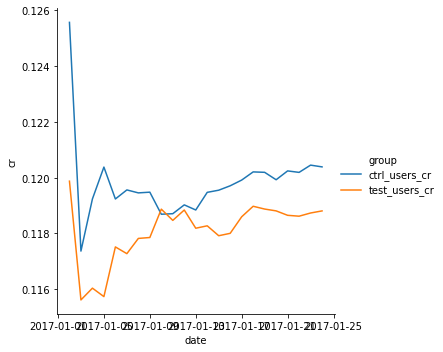

In [72]:
# visualize
sns.relplot(x='date',y='cr',data=df2_groupped_unpivot,kind='line',hue='group')


In [73]:
df2_groupped_unpivot.agg({'date':['min','max']})

,date
min,2017-01-02
max,2017-01-24


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

Ho: p_old = p_new, there is now difference between CR for new and old pages

Ha: p_old < p_new, CR for the new page is higher that for the old one

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [89]:
p_new = df2.converted.mean() # under task definition "Assume under the null hypothesis,  𝑝𝑛𝑒𝑤  and  𝑝𝑜𝑙𝑑  both have "true" success rates equal to the converted success rate regardless of page"
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [74]:
p_old = df2.converted.mean() # under task definition "Assume under the null hypothesis,  𝑝𝑛𝑒𝑤  and  𝑝𝑜𝑙𝑑  both have "true" success rates equal to the converted success rate regardless of page"
p_old

0.11959708724499628

c. What is $n_{new}$?

In [97]:
n_new = df2['group'].value_counts()[0]
#n_new = df2['landing_page'].value_counts()[0]
print(n_new)
print(df2['group'].value_counts())
#print(df2['landing_page'].value_counts())

145310
new_page    145310
old_page    145274
Name: landing_page, dtype: int64


d. What is $n_{old}$?

In [94]:
n_old = df2['group'].value_counts()[1]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [108]:
# np.random.choice(a=2, size = 10, p=[0.9,0.1])
new_page_converted = np.random.choice(a=2,size=n_new,p=[1-p_new, p_new])
new_page_converted.mean()

0.11941366733191108

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [109]:
old_page_converted = np.random.choice(a=2,size=n_old,p=[1-p_old, p_old])
old_page_converted.mean()

0.1184864463014717

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [110]:
new_page_converted.mean() - old_page_converted.mean()

0.0009272210304393791

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [120]:
import timeit
%timeit

p_diffs_simulated = []
for _ in range(10000):
    old_page_converted = np.random.choice(a=2,size=n_old,p=[1-p_old, p_old])
    new_page_converted = np.random.choice(a=2,size=n_new,p=[1-p_new, p_new])
    p_diffs_simulated.append(new_page_converted.mean() - old_page_converted.mean())

p_diffs_simulated = np.array(p_diffs_simulated)
p_diffs_simulated.mean()

8.123397986071146e-07

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

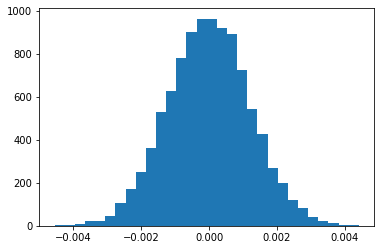

In [123]:
plt.hist(x = p_diffs_simulated, bins=30)
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [124]:
p_diffs_actual = df2.loc[df2['landing_page'] == 'new_page'].converted.mean() - df2.loc[df2['landing_page'] == 'old_page'].converted.mean()
print(f'p_diffs_actual: {p_diffs_actual}')
(p_diffs_simulated > p_diffs_actual).mean() # p-value


p_diffs_actual: -0.0015782389853555567


0.9037

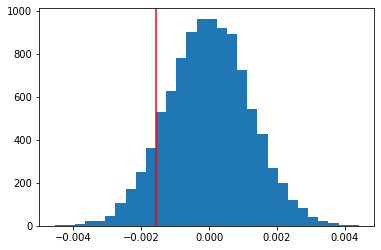

In [125]:
plt.hist(x = p_diffs_simulated, bins=30)
plt.axvline(x=p_diffs_actual, color='red')
plt.show()

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

Proportion of p_diffs_simulated that are higher than actual - this is probability to observe p_diffs as we got in our experiment or higher under null hypo that p_new-n_old=0. As we see null hypo implies that p_new-p_old not exactly =0 but has distribution around 0! Our p-value is huge 0.9037 that means that we fail to reject null hypo that there is significant positive(!) difference between p_new and p_old

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [152]:
import statsmodels.api as sm

n_old_conversions = df2.loc[df2['landing_page'] == 'old_page']['converted'].sum()
n_new_conversions = df2.loc[df2['landing_page'] == 'new_page']['converted'].sum()
n_old_total = df2['landing_page'].value_counts()[1]
n_new_total = df2['landing_page'].value_counts()[0]
cr_old = df2.loc[df2['landing_page'] == 'old_page']['converted'].mean()
cr_new = df2.loc[df2['landing_page'] == 'new_page']['converted'].mean()

print(f'n_old_conversions: {n_old_conversions}')
print(f'n_new_conversions: {n_new_conversions}')
print(f'n_old: {n_old}')
print(f'n_new: {n_new}')
print(f'cr_old: {cr_old}')
print(f'cr_new: {cr_new}')


n_old_conversions: 17489
n_new_conversions: 17264
n_old: 145274
n_new: 145310
cr_old: 0.1203863045004612
cr_new: 0.11880806551510564


In [77]:
df2_conversions = df2.groupby(by='landing_page').agg({'converted':['count','sum','mean']})
df2_conversions
#df2_conversions['converted']['count'][1]


converted                 
                 count    sum      mean
landing_page                           
new_page        145310  17264  0.118808
old_page        145274  17489  0.120386

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [159]:
z_score, p_value = sm.stats.proportions_ztest(
    count=[n_new_conversions, n_old_conversions],
    nobs=[n_new_total, n_old_total], 
    value=0,
    alternative='larger') # p1 > p2 (see help); 'two-sided' twice bigger!
z_score, p_value

(-1.3109241984234394, 0.18988337448195103)

In [143]:
?sm.stats.proportions_ztest

In [158]:
from scipy.stats import norm
#?norm.cdf
1- norm.cdf(x = z_score) # right side of the z-distribution

0.9050583127590245

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

p-value agrees with simulation, it's again huge =0.905 what mean that we can't refuse the null cr_new - c_old >= 0 (>= because i tested one-sided or 'lager'!)

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**
Logistic regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [174]:
# create dummy variable for the group colums
df2[['control','ab_page']] = pd.get_dummies(df['group'])
#df2.loc[df2['group'] != 'control'].head()
df2.drop(columns=['control'], inplace=True)

# add intercept column
df2['intercept'] = 1

# check
df2.loc[df2['group'] != 'control'].head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [195]:
model_logreg = sm.Logit(endog=df2['converted'], exog=df2[['intercept','ab_page']])
results = model_logreg.fit()

# check help, 1st argument - predicted var in our case if an user converted or no (it's important in the meaning of understanding dataset with which we are working: it's user's aggregated data, users must be unique, other columns show data about their activity and segments)

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


In [190]:
?sm.Logit

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [194]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 01 Sep 2022   Pseudo R-squ.:               8.077e-06
Time:                        13:03:21   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Put your answer here.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [197]:
countries_df = pd.read_csv('/Users/Andrew/Documents/Docs/Analytics/A:B testing/Analyze AB Test Results (Sadiq Alreemi)/AnalyzeABTestResults/countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [206]:
### Create the necessary dummy variables
countries_df[['CA','UK','US']] = pd.get_dummies(countries_df['country'])
countries_df.head()

,user_id,country,CA,UK,US
0,834778,UK,0,1,0
1,928468,US,0,0,1
2,822059,UK,0,1,0
3,711597,UK,0,1,0
4,710616,UK,0,1,0


In [207]:
df2_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner').reset_index()
df2_new.head()


,user_id,country,CA,UK,US,timestamp,group,landing_page,converted,ab_page,intercept
0,834778,UK,0,1,0,2017-01-14 23:08:43.304998,control,old_page,0,0,1
1,928468,US,0,0,1,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
2,822059,UK,0,1,0,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
3,711597,UK,0,1,0,2017-01-22 03:14:24.763511,control,old_page,0,0,1
4,710616,UK,0,1,0,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [208]:
# firts aggregate
df2_new.groupby(by=['group','country']).agg({'user_id': 'count','converted':['sum', 'mean']})


user_id converted          
                    count       sum      mean
group     country                            
control   CA         7198       855  0.118783
          UK        36360      4364  0.120022
          US       101716     12270  0.120630
treatment CA         7301       817  0.111902
          UK        36106      4375  0.121171
          US       101903     12072  0.118466

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [ ]:
### Fit Your Linear Model And Obtain the Results

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.